In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('D:\OneDrive\Homework\Project_3\Data\Model_Data_Rev1.xlsx')

In [3]:
df.dropna(inplace=True)
df_data_clean = df.reset_index(drop=True)

In [4]:
df_data_clean.head(2)

,Date,Active_Rig_Count,Offshore_Rig_Supply,Offshore_Rig_Active,Offshore_Utilization_Rate,Land_Rig_Active_Count,Crude_Price_2010_USD,Adjusted_Nat_Gas_Price_2010,World_Oil_Cunsump,World_Oil_Production
0,1985-11-01,3550,656.13,560.67,85.45,2989.33,61.65,4.721732,4992.770925,4929.677119
1,1985-12-01,3618,655.52,557.97,85.12,3060.03,54.23,4.540844,4992.770925,4929.677119


In [5]:
df_data_clean.columns

Index(['Date', 'Active_Rig_Count', 'Offshore_Rig_Supply',
       'Offshore_Rig_Active', 'Offshore_Utilization_Rate',
       'Land_Rig_Active_Count', 'Crude_Price_2010_USD',
       'Adjusted_Nat_Gas_Price_2010', 'World_Oil_Cunsump',
       'World_Oil_Production'],
      dtype='object')

In [6]:
df_data_clean.columns = ['Date', 'Active Rig Count', 'Offshore Rig Supply',
       'Offshore Rig Active', 'Offshore Utilization Rate',
       'Land Rig Active', 'Crude Price USD',
       'Nat Gas Price', 'Oil Cunsumption',
       'Oil Production' ]

In [7]:
df_data_clean = df_data_clean[['Offshore Rig Active', 'Offshore Utilization Rate', 'Crude Price USD',
                 'Nat Gas Price', 'Oil Cunsumption', 'Oil Production', 'Land Rig Active']]

In [8]:
df_data_clean.head(2)

,Offshore Rig Active,Offshore Utilization Rate,Crude Price USD,Nat Gas Price,Oil Cunsumption,Oil Production,Land Rig Active
0,560.67,85.45,61.65,4.721732,4992.770925,4929.677119,2989.33
1,557.97,85.12,54.23,4.540844,4992.770925,4929.677119,3060.03


In [9]:
corr = df_data_clean.corr()

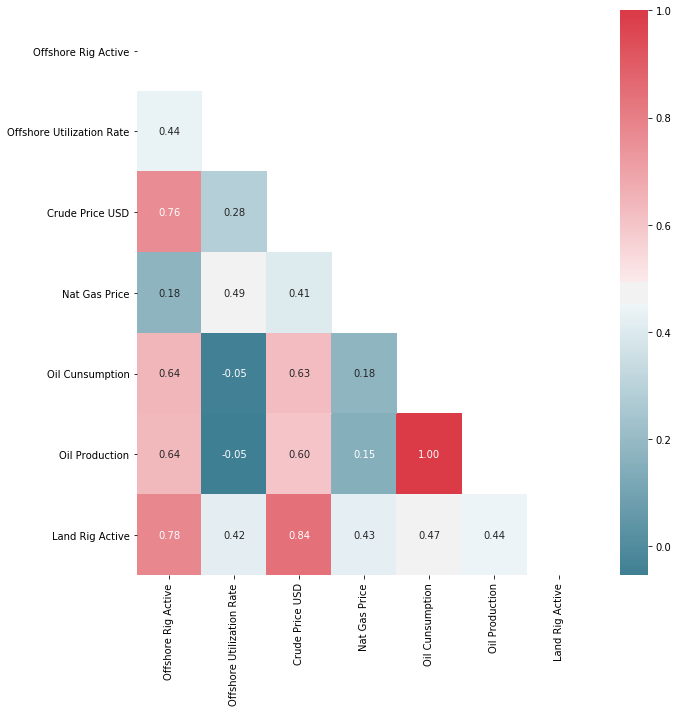

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
#plt.show()
plt.tight_layout()
plt.savefig("heatmap.png")

In [ ]:
def heatMap(df, mirror):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(10, 10))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      #plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      #plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   #plt.show()
      plt.tight_layout().savefig("heatmap.png")

In [ ]:
heatMap(df_data_clean, False)